Importing Libraries

In [22]:
!pip install pgmpy
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from pgmpy.models import BayesianNetwork
import matplotlib.pyplot as plt
from IPython.display import Image, display
import networkx as nx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Data processing

In [23]:
train_data = pd.read_csv('Training_encoded.csv')

In [24]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,acidity,vomiting,burning_micturition,fatigue,...,Dengue,Fungal infection,Gastroenteritis,Heart attack,Jaundice,Malaria,Migraine,Pneumonia,Tuberculosis,Urinary tract infection
0,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   itching                       1560 non-null   int64
 1   skin_rash                     1560 non-null   int64
 2   nodal_skin_eruptions          1560 non-null   int64
 3   continuous_sneezing           1560 non-null   int64
 4   shivering                     1560 non-null   int64
 5   chills                        1560 non-null   int64
 6   acidity                       1560 non-null   int64
 7   vomiting                      1560 non-null   int64
 8   burning_micturition           1560 non-null   int64
 9   fatigue                       1560 non-null   int64
 10  weight_loss                   1560 non-null   int64
 11  lethargy                      1560 non-null   int64
 12  cough                         1560 non-null   int64
 13  high_fever                    156

In [26]:
train_data.isnull().any()

itching                    False
skin_rash                  False
nodal_skin_eruptions       False
continuous_sneezing        False
shivering                  False
                           ...  
Malaria                    False
Migraine                   False
Pneumonia                  False
Tuberculosis               False
Urinary tract infection    False
Length: 68, dtype: bool

In [27]:
train_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,acidity,vomiting,burning_micturition,fatigue,...,Dengue,Fungal infection,Gastroenteritis,Heart attack,Jaundice,Malaria,Migraine,Pneumonia,Tuberculosis,Urinary tract infection
0,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1556,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1557,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1558,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
train_data.shape

(1560, 68)

Building the Bayesian network

In [29]:
model= BayesianNetwork([('Dengue','weakness_in_limbs'),
                        ('Dengue','muscle_weakness'),
                        ('Dengue','high_fever'),
                        ('Dengue','mild_fever'),
                        ('Dengue','nausea'),
                        ('Dengue','vomiting'),
                        ('Dengue','skin_rash'),
                        ('Urinary tract infection','chills'),
                        ('Urinary tract infection','high_fever'),
                        ('Urinary tract infection','mild_fever'),
                        ('Urinary tract infection','foul_smell_of urine'),
                        ('Urinary tract infection','bladder_discomfort'),
                        ('Urinary tract infection','continuous_feel_of_urine'),
                        ('Urinary tract infection','burning_micturition'),
                        ('Fungal infection','dischromic _patches'),
                        ('Fungal infection','itching'),
                        ('Fungal infection','skin_rash'),
                        ('Fungal infection','nodal_skin_eruptions'),
                        ('Gastroenteritis','dehydration'),
                        ('Gastroenteritis','diarrhoea'),
                        ('Gastroenteritis','vomiting'),
                        ('Gastroenteritis','sunken_eyes'),
                        ('Chicken pox','red_spots_over_body'),
                        ('Chicken pox','malaise'),
                        ('Chicken pox','mild_fever'),
                        ('Chicken pox','swelled_lymph_nodes'),
                        ('Chicken pox','loss_of_appetite'),
                        ('Chicken pox','headache'),
                        ('Chicken pox','high_fever'),
                        ('Chicken pox','lethargy'),
                        ('Chicken pox','fatigue'),
                        ('Chicken pox','skin_rash'),
                        ('Chicken pox','itching'),
                        ('Chronic cholestasis','yellowing_of_eyes'),
                        ('Chronic cholestasis','abdominal_pain'),
                        ('Chronic cholestasis','yellowish_skin'),
                        ('Chronic cholestasis','nausea'),
                        ('Chronic cholestasis','loss_of_appetite'),
                        ('Chronic cholestasis','vomiting'),
                        ('Chronic cholestasis','itching'),
                        ('Common Cold','continuous_sneezing'),
                        ('Common Cold','chills'),
                        ('Common Cold','fatigue'),
                        ('Common Cold','cough'),
                        ('Common Cold','high_fever'),
                        ('Common Cold','headache'),
                        ('Common Cold','swelled_lymph_nodes'),
                        ('Common Cold','malaise'),
                        ('Common Cold','phlegm'),
                        ('Common Cold','throat_irritation'),
                        ('Common Cold','redness_of_eyes'),
                        ('Common Cold','sinus_pressure'),
                        ('Common Cold','runny_nose'),
                        ('Common Cold','congestion'),
                        ('Common Cold','chest_pain'),
                        ('Common Cold','loss_of_smell'),
                        ('Common Cold','muscle_pain'),
                        ('Heart attack','vomiting'),
                        ('Heart attack','breathlessness'),
                        ('Heart attack','sweating'),
                        ('Heart attack','chest_pain'),
                        ('Jaundice','itching'),
                        ('Jaundice','vomiting'),
                        ('Jaundice','fatigue'),
                        ('Jaundice','weight_loss'),
                        ('Jaundice','high_fever'),
                        ('Jaundice','yellowish_skin'),
                        ('Jaundice','dark_urine'),
                        ('Jaundice','abdominal_pain'),
                        ('Malaria','chills'),
                        ('Malaria','vomiting'),
                        ('Malaria','high_fever'),
                        ('Malaria','sweating'),
                        ('Malaria','headache'),
                        ('Malaria','nausea'),
                        ('Malaria','muscle_pain'),
                        ('Malaria','diarrhoea'),
                        ('Malaria','mild_fever'),
                        ('Malaria','shivering'),
                        ('Pneumonia','rusty_sputum'),
                        ('Pneumonia','fast_heart_rate'),
                        ('Pneumonia','chest_pain'),
                        ('Pneumonia','phlegm'),
                        ('Pneumonia','malaise'),
                        ('Pneumonia','sweating'),
                        ('Pneumonia','breathlessness'),
                        ('Pneumonia','high_fever'),
                        ('Pneumonia','cough'),
                        ('Pneumonia','fatigue'),
                        ('Pneumonia','chills'),
                        ('Migraine','acidity'),
                        ('Migraine','indigestion'),
                        ('Migraine','headache'),
                        ('Migraine','blurred_and_distorted_vision'),
                        ('Migraine','excessive_hunger'),
                        ('Migraine','stiff_neck'),
                        ('Migraine','depression'),
                        ('Migraine','irritability'),
                        ('Migraine','visual_disturbances'),
                        ('Tuberculosis','chills'),
                        ('Tuberculosis','vomiting'),
                        ('Tuberculosis','fatigue'),
                        ('Tuberculosis','weight_loss'),
                        ('Tuberculosis','cough'),
                        ('Tuberculosis','high_fever'),
                        ('Tuberculosis','breathlessness'),
                        ('Tuberculosis','sweating'),
                        ('Tuberculosis','loss_of_appetite'),
                        ('Tuberculosis','mild_fever'),
                        ('Tuberculosis','yellowing_of_eyes'),
                        ('Tuberculosis','swelled_lymph_nodes'),
                        ('Tuberculosis','malaise'),
                        ('Tuberculosis','phlegm'),
                        ('Tuberculosis','chest_pain'),
                        ('Tuberculosis','blood_in_sputum')
                        ])

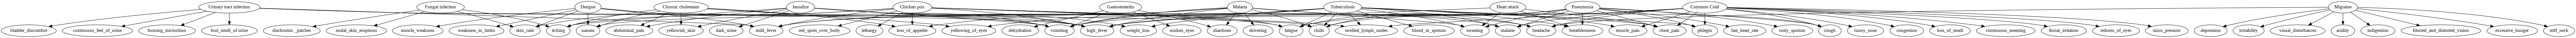

In [30]:
display(Image((nx.drawing.nx_pydot.to_pydot(model)).create_png()))

In [31]:
print(model)
print(model.nodes)

BayesianNetwork with 68 nodes and 115 edges
['Dengue', 'weakness_in_limbs', 'muscle_weakness', 'high_fever', 'mild_fever', 'nausea', 'vomiting', 'skin_rash', 'Urinary tract infection', 'chills', 'foul_smell_of urine', 'bladder_discomfort', 'continuous_feel_of_urine', 'burning_micturition', 'Fungal infection', 'dischromic _patches', 'itching', 'nodal_skin_eruptions', 'Gastroenteritis', 'dehydration', 'diarrhoea', 'sunken_eyes', 'Chicken pox', 'red_spots_over_body', 'malaise', 'swelled_lymph_nodes', 'loss_of_appetite', 'headache', 'lethargy', 'fatigue', 'Chronic cholestasis', 'yellowing_of_eyes', 'abdominal_pain', 'yellowish_skin', 'Common Cold', 'continuous_sneezing', 'cough', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'loss_of_smell', 'muscle_pain', 'Heart attack', 'breathlessness', 'sweating', 'Jaundice', 'weight_loss', 'dark_urine', 'Malaria', 'shivering', 'Pneumonia', 'rusty_sputum', 'fast_heart_rate', 'Migraine', 'a

Parameter Learning

In [32]:
from pgmpy.estimators import BayesianEstimator

In [33]:
model.fit(train_data, estimator=BayesianEstimator, prior_type="BDeu")
print(model.check_model())

True


In [34]:
for rv in list(model.nodes):
  print('CPD for ' + rv + ':\n' + str(model.get_cpds(rv)) + '\n')

CPD for Dengue:
+-----------+-----------+
| Dengue(0) | 0.921725  |
+-----------+-----------+
| Dengue(1) | 0.0782748 |
+-----------+-----------+

CPD for weakness_in_limbs:
+----------------------+-----------+-----------+
| Dengue               | Dengue(0) | Dengue(1) |
+----------------------+-----------+-----------+
| weakness_in_limbs(0) | 1.0       | 1.0       |
+----------------------+-----------+-----------+

CPD for muscle_weakness:
+--------------------+-----------+-----------+
| Dengue             | Dengue(0) | Dengue(1) |
+--------------------+-----------+-----------+
| muscle_weakness(0) | 1.0       | 1.0       |
+--------------------+-----------+-----------+

CPD for high_fever:
+-------------------------+-----+----------------------------+
| Chicken pox             | ... | Chicken pox(1)             |
+-------------------------+-----+----------------------------+
| Common Cold             | ... | Common Cold(1)             |
+-------------------------+-----+--------------

Inference

In [35]:
from pgmpy.inference.EliminationOrder import WeightedMinFill, MinNeighbors
from pgmpy.inference import VariableElimination

In [36]:
all_nodes = model.nodes()
print(all_nodes)

['Dengue', 'weakness_in_limbs', 'muscle_weakness', 'high_fever', 'mild_fever', 'nausea', 'vomiting', 'skin_rash', 'Urinary tract infection', 'chills', 'foul_smell_of urine', 'bladder_discomfort', 'continuous_feel_of_urine', 'burning_micturition', 'Fungal infection', 'dischromic _patches', 'itching', 'nodal_skin_eruptions', 'Gastroenteritis', 'dehydration', 'diarrhoea', 'sunken_eyes', 'Chicken pox', 'red_spots_over_body', 'malaise', 'swelled_lymph_nodes', 'loss_of_appetite', 'headache', 'lethargy', 'fatigue', 'Chronic cholestasis', 'yellowing_of_eyes', 'abdominal_pain', 'yellowish_skin', 'Common Cold', 'continuous_sneezing', 'cough', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'loss_of_smell', 'muscle_pain', 'Heart attack', 'breathlessness', 'sweating', 'Jaundice', 'weight_loss', 'dark_urine', 'Malaria', 'shivering', 'Pneumonia', 'rusty_sputum', 'fast_heart_rate', 'Migraine', 'acidity', 'indigestion', 'blurred_and_distort

In [37]:
WeightedMinFill(model).get_elimination_order(all_nodes)

  0%|          | 0/68 [00:00<?, ?it/s]

['rusty_sputum',
 'blurred_and_distorted_vision',
 'sinus_pressure',
 'acidity',
 'depression',
 'lethargy',
 'excessive_hunger',
 'indigestion',
 'congestion',
 'burning_micturition',
 'visual_disturbances',
 'weakness_in_limbs',
 'irritability',
 'continuous_feel_of_urine',
 'dark_urine',
 'blood_in_sputum',
 'dischromic _patches',
 'dehydration',
 'red_spots_over_body',
 'throat_irritation',
 'muscle_weakness',
 'fast_heart_rate',
 'stiff_neck',
 'shivering',
 'sunken_eyes',
 'continuous_sneezing',
 'redness_of_eyes',
 'loss_of_smell',
 'runny_nose',
 'foul_smell_of urine',
 'nodal_skin_eruptions',
 'bladder_discomfort',
 'weight_loss',
 'abdominal_pain',
 'diarrhoea',
 'muscle_pain',
 'yellowish_skin',
 'yellowing_of_eyes',
 'phlegm',
 'skin_rash',
 'nausea',
 'breathlessness',
 'cough',
 'swelled_lymph_nodes',
 'loss_of_appetite',
 'itching',
 'chest_pain',
 'headache',
 'Migraine',
 'sweating',
 'Fungal infection',
 'malaise',
 'fatigue',
 'mild_fever',
 'chills',
 'Gastroenterit

In [38]:
inference = VariableElimination(model)

In [39]:
for var in all_nodes:
  print('Probability at node',var,'is: ')
  print(inference.query([var]))

Probability at node Dengue is: 
+-----------+---------------+
| Dengue    |   phi(Dengue) |
+===========+===============+
| Dengue(0) |        0.9217 |
+-----------+---------------+
| Dengue(1) |        0.0783 |
+-----------+---------------+
Probability at node weakness_in_limbs is: 
+----------------------+--------------------------+
| weakness_in_limbs    |   phi(weakness_in_limbs) |
+======================+==========================+
| weakness_in_limbs(0) |                   1.0000 |
+----------------------+--------------------------+
Probability at node muscle_weakness is: 
+--------------------+------------------------+
| muscle_weakness    |   phi(muscle_weakness) |
+====================+========================+
| muscle_weakness(0) |                 1.0000 |
+--------------------+------------------------+
Probability at node high_fever is: 
+---------------+-------------------+
| high_fever    |   phi(high_fever) |
+===============+===================+
| high_fever(0) |       

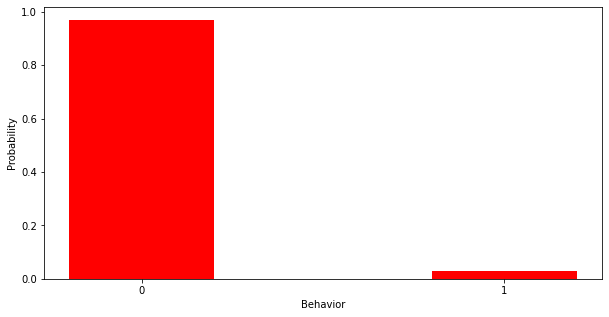

In [40]:
q = inference.query(['Common Cold'],evidence={'cough':1, 'continuous_sneezing':0}, joint=False)['Common Cold']
val = q.values
x = ['0','1']
fig = plt.figure(figsize = (10, 5))
plt.bar(x, val, color ='red', width = 0.4)
plt.xlabel('Behavior')
plt.ylabel('Probability')
plt.show()

In [44]:
test_data = pd.read_csv('Testing.csv')
test_data = test_data.copy()
y = test_data['prognosis']
test_data.drop(['prognosis'], axis=1, inplace=True)
print(test_data)
y_pred = model.predict(test_data)

!pip install texttable
from texttable import Texttable

t = Texttable()
t.add_row(['Actual Disease', 'Prediction'])
print('Actual Disease, Prediction')
for i in test_data.index:
    for col in y_pred.columns:
        if y_pred[col][i] == 1:
            t.add_row([col, y[i]])
print(t.draw())


    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         1          0                     0                    0          0   
2         0          0                     0                    0          0   
3         0          0                     0                    0          0   
4         1          0                     0                    0          0   
5         0          0                     0                    0          0   
6         1          1                     0                    0          0   
7         0          1                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    1          0   
10        0          0                     0                    0          0   
11        0          0                  

  0%|          | 0/14 [00:00<?, ?it/s]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Actual Disease, Prediction
+-------------------------+-------------------------+
| Actual Disease          | Prediction              |
+-------------------------+-------------------------+
| Fungal infection        | Fungal infection        |
+-------------------------+-------------------------+
| Chronic cholestasis     | Chronic cholestasis     |
+-------------------------+-------------------------+
| Gastroenteritis         | Gastroenteritis         |
+-------------------------+-------------------------+
| Migraine                | Migraine                |
+-------------------------+-------------------------+
| Jaundice                | Jaundice                |
+-------------------------+-------------------------+
| Malaria                 | Malaria                 |
+-------------------------+-------------------------+
| Chicken pox             | Chicken pox             |
+---------